# An Investigation Towards Probability

- Name: Galvin Gao
- Subject: Pre-Calculus
- Assignment: Winter Homework
- Date: 2019.1.20

In order to complete the required process of the assignment, firstly we need to simulate the process of we _throwing the coin forever_. Let's create a standard `TestCase` that we can change the parameters based on our needs.



# Formula Involved

1. Average ${\displaystyle \bar{x} ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$

2. Standard Deviation ${\sigma = \sqrt{\dfrac{1}{n} \displaystyle\sum ^{n}_{i=1} \left(x_{i} - \bar{x} \right) ^{2}}}$

3. $x_n = 50n \left\{1 \leq n \leq 40 \right\}$

In [56]:
import random
import math
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
from multiprocessing.dummy import Pool
from IPython.display import HTML, display, Math, Markdown
import tabulate
tqdm.pandas()
%config InlineBackend.figure_format='svg'
%matplotlib inline

class TestCase:
    def __init__(self, flips=500, max_possible_number=1):
        self.trials = 10 ** 3
        self.flips = flips
        self.max_possible_number = max_possible_number
        self.results = []
        self._simulate()
        self._calculate_avg()
        self._calculate_stndev()
        self._calculate_stats()
    
    def __repr__(self):
        return f"<TestCase flips={self.flips}>"
    
    def _simulate(self):
        for _ in range(self.trials):
            heads = 0
            for _ in range(self.flips):
                if random.randint(0, self.max_possible_number) == 1:
                    heads += 1
            self.results.append(heads)
    
    def _calculate_avg(self):
        self.average = sum(self.results) / self.trials
        self.average_log = math.log(self.average)
    
    def _calculate_stndev(self):
        # `Formula Involved` #2
        diffs = [(result - self.average) ** 2 for result in self.results]
        stndev = math.sqrt(sum(diffs) / len(self.results))
        self.stndev = stndev
        self.stndev_log = math.log(stndev)
    
    def _calculate_stats(self):
        # calculate log(flips)
        self.flips_log = math.log(self.flips)
        
        # calculate p-value (probability of success)
        self.p = self.average / self.flips
        self.p_log = math.log(self.p)
        
        # calculate q-value (probability of failure)
        self.q = 1 - self.p
        self.q_log = math.log(self.q)
        
        # calculate ideal stndev
        self.ideal_stndev = math.sqrt(self.flips * self.p * self.q)
        self.ideal_stndev_log = math.log(self.ideal_stndev)

In [64]:
sample = TestCase()
print(f"The standard deviation in sample {sample} \
is {sample.stndev}, the average \
is {sample.average}.")

The standard deviation in sample <TestCase flips=500> is 10.644348688388575, the average is 249.971.


Now we know the standard deviation of one `TestCase`, let's simulate a dataset for all of the experiments.

In [58]:
number_range = range(50, 2050, 50)
results = []
for num in tqdm(number_range, desc="Generating Data...", leave=False):
    current_trial = TestCase(num)
    results.append(current_trial)

In [59]:
print(f"Test dataset with amount {len(results)} has been generated.")

Test dataset with amount 40 has been generated.


# Question 1: Solve $\bar{x}(n, p) = ?$

\begin{align}
\bar{x}(n, p) & = n^ep^f \\
  \ln(\bar{x}) & = \ln(n^ep^f) \\
              & = \ln(n^e) + \ln(p^f) \\
  \ln(\bar{x}) & = e \cdot \ln(n) + f \cdot \ln(p)
\end{align}


## Fit Line

<IPython.core.display.Math object>

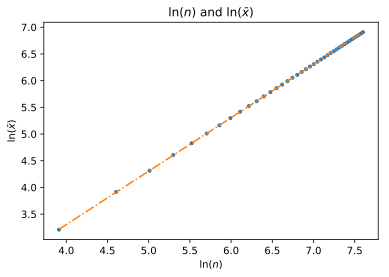

In [60]:
display(Markdown("## Fit Line"))
# Now we plot them
plt.title("$\ln(n)$ and $\ln(\\bar{x})$")
plt.xlabel("$\ln(n)$")
plt.ylabel("$\ln(\\bar{x})$")
x, y = zip(*[[result.flips_log, \
              result.average_log] for result in results])
fit = np.polyfit(x, y, 1)
display(Math("+".join([f"{g}x^{i}" if int(i) > 0 else f"{g}^{i}" for i, g in enumerate(fit)][::-1])[:-2]))
plt.plot(x, y, '.', x, np.poly1d(fit)(x), '-.')
plt.show()

In [61]:
display(Markdown("## Calculation"))

b = fit[1]
def avg(data):
    return sum(data) / len(data)
p_log = avg([result.p_log for result in results])
f = b / p_log
display(Math("f = \\frac{" + str(b) + "}{" + str(p_log) + "}"))
display(Math("\ \  = " + str(f)))

display(Markdown("## Solution"))
display(Math("\\boxed{\\bar{x}(n, p) = n^ep^f = n^ep^{" + str(f) + "}}"))

## Calculation

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Solution

<IPython.core.display.Math object>

# Question 2: Solve $\sigma (n, p) = ?$

$$q = 1 - p$$
$$\sigma(n, p) = n^ap^bq^c$$

To solve the equation above, we need to first observe the relationship between $\sigma$ and $n, p$. To achieve this, we need to observe the change of $\sigma$ by changing the two parameters.

## Fit Line

<IPython.core.display.Math object>

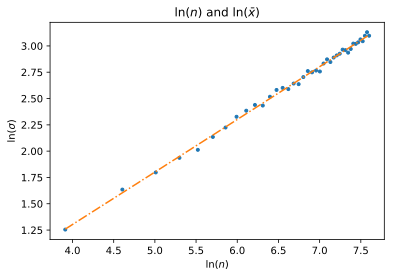

In [62]:
# Now we plot them
plt.title("$\ln(n)$ and $\ln(\\bar{x})$")
plt.xlabel("$\ln(n)$")
plt.ylabel("$\ln(\\sigma)$")
x, y = zip(*[[result.flips_log,\
              result.stndev_log] for result in results])
fit = np.polyfit(x, y, 2)
display(Math("+".join([f"{g}x^{i}" if int(i) > 0 else f"{g}^{i}" for i, g in enumerate(fit)][::-1])[:-2]))
plt.plot(x, y, '.', x, np.poly1d(fit)(x), '-.')
plt.show()

## Analysis

Because the graph above illustrates a near-linear graph ($c \approx 0$), we can assume $a$, $b$ and $c$ were all $1$s because if and only if the exponent is $1$ the graph can be a linear graph. That way, the final equation can be determined as $\sigma(n, p) = n^1p^1q^1$, which equals to $\sigma(n, p) = npq$.

# Appendix 1: Data Table

In [63]:
table = [[result.flips, result.flips_log, result.average, result.average_log, \
         result.p, result.p_log, result.q, result.q_log, result.stndev, \
         result.stndev_log, result.ideal_stndev, result.ideal_stndev_log] for result in results]

display(Markdown(tabulate.tabulate(table, tablefmt='github', \
                 headers=['$n$', '$\ln(n)$', '$\\bar{x}$', '$\ln(\\bar{x})$', \
                          '$p$', '$\ln(p)$', '$q$', '$\ln(q)$', '$\sigma$', \
                          '$\ln(\sigma)$', '$\sigma_i$', '$\ln(\sigma_i)$'], \
                 floatfmt=(".0f", ".3f", ".3f", ".3f", ".1f",\
                           ".2f", ".1f", ".2f", ".3f", ".3f", ".3f", ".3f"))))

|   $n$ |   $\ln(n)$ |   $\bar{x}$ |   $\ln(\bar{x})$ |   $p$ |   $\ln(p)$ |   $q$ |   $\ln(q)$ |   $\sigma$ |   $\ln(\sigma)$ |   $\sigma_i$ |   $\ln(\sigma_i)$ |
|-------|------------|-------------|------------------|-------|------------|-------|------------|------------|-----------------|--------------|-------------------|
|    50 |      3.912 |      24.775 |            3.210 |   0.5 |      -0.70 |   0.5 |      -0.68 |      3.507 |           1.255 |        3.535 |             1.263 |
|   100 |      4.605 |      50.114 |            3.914 |   0.5 |      -0.69 |   0.5 |      -0.70 |      5.129 |           1.635 |        5.000 |             1.609 |
|   150 |      5.011 |      74.703 |            4.314 |   0.5 |      -0.70 |   0.5 |      -0.69 |      6.035 |           1.798 |        6.124 |             1.812 |
|   200 |      5.298 |     100.135 |            4.607 |   0.5 |      -0.69 |   0.5 |      -0.69 |      6.934 |           1.936 |        7.071 |             1.956 |
|   250 |      5.521 |     124.890 |            4.827 |   0.5 |      -0.69 |   0.5 |      -0.69 |      7.482 |           2.012 |        7.906 |             2.068 |
|   300 |      5.704 |     149.887 |            5.010 |   0.5 |      -0.69 |   0.5 |      -0.69 |      8.457 |           2.135 |        8.660 |             2.159 |
|   350 |      5.858 |     174.956 |            5.165 |   0.5 |      -0.69 |   0.5 |      -0.69 |      9.247 |           2.224 |        9.354 |             2.236 |
|   400 |      5.991 |     199.969 |            5.298 |   0.5 |      -0.69 |   0.5 |      -0.69 |     10.245 |           2.327 |       10.000 |             2.303 |
|   450 |      6.109 |     225.235 |            5.417 |   0.5 |      -0.69 |   0.5 |      -0.69 |     10.853 |           2.384 |       10.607 |             2.361 |
|   500 |      6.215 |     250.467 |            5.523 |   0.5 |      -0.69 |   0.5 |      -0.70 |     11.465 |           2.439 |       11.180 |             2.414 |
|   550 |      6.310 |     274.355 |            5.614 |   0.5 |      -0.70 |   0.5 |      -0.69 |     11.394 |           2.433 |       11.726 |             2.462 |
|   600 |      6.397 |     300.153 |            5.704 |   0.5 |      -0.69 |   0.5 |      -0.69 |     12.392 |           2.517 |       12.247 |             2.505 |
|   650 |      6.477 |     325.244 |            5.785 |   0.5 |      -0.69 |   0.5 |      -0.69 |     13.218 |           2.582 |       12.748 |             2.545 |
|   700 |      6.551 |     350.648 |            5.860 |   0.5 |      -0.69 |   0.5 |      -0.70 |     13.478 |           2.601 |       13.229 |             2.582 |
|   750 |      6.620 |     374.805 |            5.926 |   0.5 |      -0.69 |   0.5 |      -0.69 |     13.324 |           2.590 |       13.693 |             2.617 |
|   800 |      6.685 |     400.294 |            5.992 |   0.5 |      -0.69 |   0.5 |      -0.69 |     14.048 |           2.642 |       14.142 |             2.649 |
|   850 |      6.745 |     426.155 |            6.055 |   0.5 |      -0.69 |   0.5 |      -0.70 |     13.965 |           2.637 |       14.577 |             2.679 |
|   900 |      6.802 |     449.361 |            6.108 |   0.5 |      -0.69 |   0.5 |      -0.69 |     14.939 |           2.704 |       15.000 |             2.708 |
|   950 |      6.856 |     475.131 |            6.164 |   0.5 |      -0.69 |   0.5 |      -0.69 |     15.816 |           2.761 |       15.411 |             2.735 |
|  1000 |      6.908 |     500.254 |            6.215 |   0.5 |      -0.69 |   0.5 |      -0.69 |     15.624 |           2.749 |       15.811 |             2.761 |
|  1050 |      6.957 |     525.850 |            6.265 |   0.5 |      -0.69 |   0.5 |      -0.69 |     15.892 |           2.766 |       16.202 |             2.785 |
|  1100 |      7.003 |     549.108 |            6.308 |   0.5 |      -0.69 |   0.5 |      -0.69 |     15.752 |           2.757 |       16.583 |             2.808 |
|  1150 |      7.048 |     575.658 |            6.356 |   0.5 |      -0.69 |   0.5 |      -0.69 |     16.991 |           2.833 |       16.956 |             2.831 |
|  1200 |      7.090 |     599.473 |            6.396 |   0.5 |      -0.69 |   0.5 |      -0.69 |     17.679 |           2.872 |       17.321 |             2.852 |
|  1250 |      7.131 |     623.713 |            6.436 |   0.5 |      -0.70 |   0.5 |      -0.69 |     17.237 |           2.847 |       17.678 |             2.872 |
|  1300 |      7.170 |     650.015 |            6.477 |   0.5 |      -0.69 |   0.5 |      -0.69 |     17.981 |           2.889 |       18.028 |             2.892 |
|  1350 |      7.208 |     675.687 |            6.516 |   0.5 |      -0.69 |   0.5 |      -0.69 |     18.352 |           2.910 |       18.371 |             2.911 |
|  1400 |      7.244 |     699.517 |            6.550 |   0.5 |      -0.69 |   0.5 |      -0.69 |     18.651 |           2.926 |       18.708 |             2.929 |
|  1450 |      7.279 |     724.684 |            6.586 |   0.5 |      -0.69 |   0.5 |      -0.69 |     19.391 |           2.965 |       19.039 |             2.947 |
|  1500 |      7.313 |     750.493 |            6.621 |   0.5 |      -0.69 |   0.5 |      -0.69 |     19.291 |           2.960 |       19.365 |             2.963 |
|  1550 |      7.346 |     775.246 |            6.653 |   0.5 |      -0.69 |   0.5 |      -0.69 |     18.839 |           2.936 |       19.685 |             2.980 |
|  1600 |      7.378 |     800.315 |            6.685 |   0.5 |      -0.69 |   0.5 |      -0.69 |     19.511 |           2.971 |       20.000 |             2.996 |
|  1650 |      7.409 |     824.997 |            6.715 |   0.5 |      -0.69 |   0.5 |      -0.69 |     20.539 |           3.022 |       20.310 |             3.011 |
|  1700 |      7.438 |     850.162 |            6.745 |   0.5 |      -0.69 |   0.5 |      -0.69 |     20.482 |           3.020 |       20.616 |             3.026 |
|  1750 |      7.467 |     875.192 |            6.774 |   0.5 |      -0.69 |   0.5 |      -0.69 |     20.776 |           3.034 |       20.917 |             3.041 |
|  1800 |      7.496 |     900.543 |            6.803 |   0.5 |      -0.69 |   0.5 |      -0.69 |     21.368 |           3.062 |       21.213 |             3.055 |
|  1850 |      7.523 |     924.229 |            6.829 |   0.5 |      -0.69 |   0.5 |      -0.69 |     21.004 |           3.045 |       21.506 |             3.068 |
|  1900 |      7.550 |     949.684 |            6.856 |   0.5 |      -0.69 |   0.5 |      -0.69 |     22.117 |           3.096 |       21.794 |             3.082 |
|  1950 |      7.576 |     975.711 |            6.883 |   0.5 |      -0.69 |   0.5 |      -0.69 |     22.878 |           3.130 |       22.079 |             3.095 |
|  2000 |      7.601 |     999.381 |            6.907 |   0.5 |      -0.69 |   0.5 |      -0.69 |     22.126 |           3.097 |       22.361 |             3.107 |

# Appendix 2: Variables Explained
- $n$: count of flipping
- $\bar{x}$: average of a set of data
- $p$: probability of success
- $q$: probability of failure. ($q = 1 - p$)
- $\sigma$: actual standard deviation
- $\sigma_i$: ideal standard deviation ($\sigma_i = \sqrt{np(1-p)}$)